In [1]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import matrix_power as mpow
from numpy.linalg import norm
import matplotlib.pyplot as plt

Xi_l = -10
Xi_r = 10
dXi = 0.1
dTau = 0.005

size = int((Xi_r - Xi_l) / dXi)
Xi = np.linspace(Xi_l, Xi_r, size, endpoint=True)

## b)
Calculate $S_H$

Our grid has `size = 200` points. $\tilde{H}_{n,m}$ and $S_H$ are a `200x200` matrices.

In [2]:
delta_n_m = np.eye(size)
delta_n_mp1 = np.eye(size, k=-1)  # delta_{n,m+1}
delta_n_mm1 = np.eye(size, k=1)  # delta_{n,m-1}
n = np.arange(1, size + 1)

HamOp = (
    -1 / dXi**2 * (delta_n_mm1 + delta_n_mp1 - 2 * delta_n_m)
    + dXi**2 * delta_n_m**2 * n**2
)

TimeEvOp = inv(np.eye(size) + 1j * dTau * HamOp) @ (np.eye(size) - 1j * dTau * HamOp)

## c)
discretise $\psi(\Epsilon,t=0)$

In [3]:
Xi_0 = 1
psi_0 = np.power(1 / (2 * np.pi), 0.25) * np.exp(-0.25 * (Xi - Xi_0) ** 2)
psi_0 /= norm(psi_0)  # normalization

## d)
calculate $\psi_n(\tau=10)$

In [4]:
Pit = np.linspace(0, 10, 9)  # Points in time
Iit = Pit / dTau  # Indices in time
Iit = Iit.astype(int)  # Indices in time as integers

steps = np.diff(Iit)
psis = [psi_0]
for i in range(len(steps)):
    psis.append(mpow(TimeEvOp, steps[i]) @ psis[-1])

(0.0, 1.25)

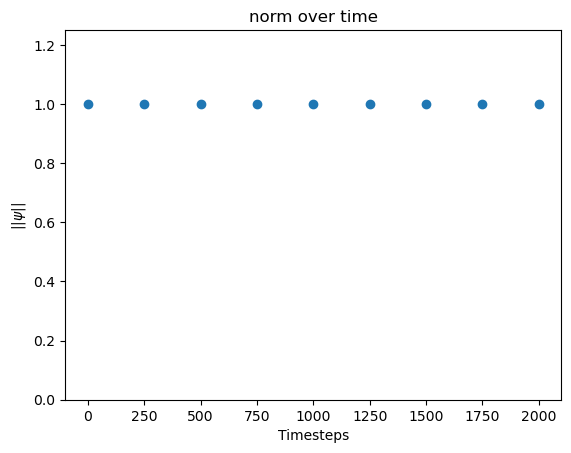

In [8]:
plt.plot(Iit, norm(psis, axis=1), linestyle="none", marker="o")
plt.xlabel("Timesteps")
plt.ylabel("$||\psi||$ ")
plt.title("norm over time")
plt.ylim(0, 1.25)

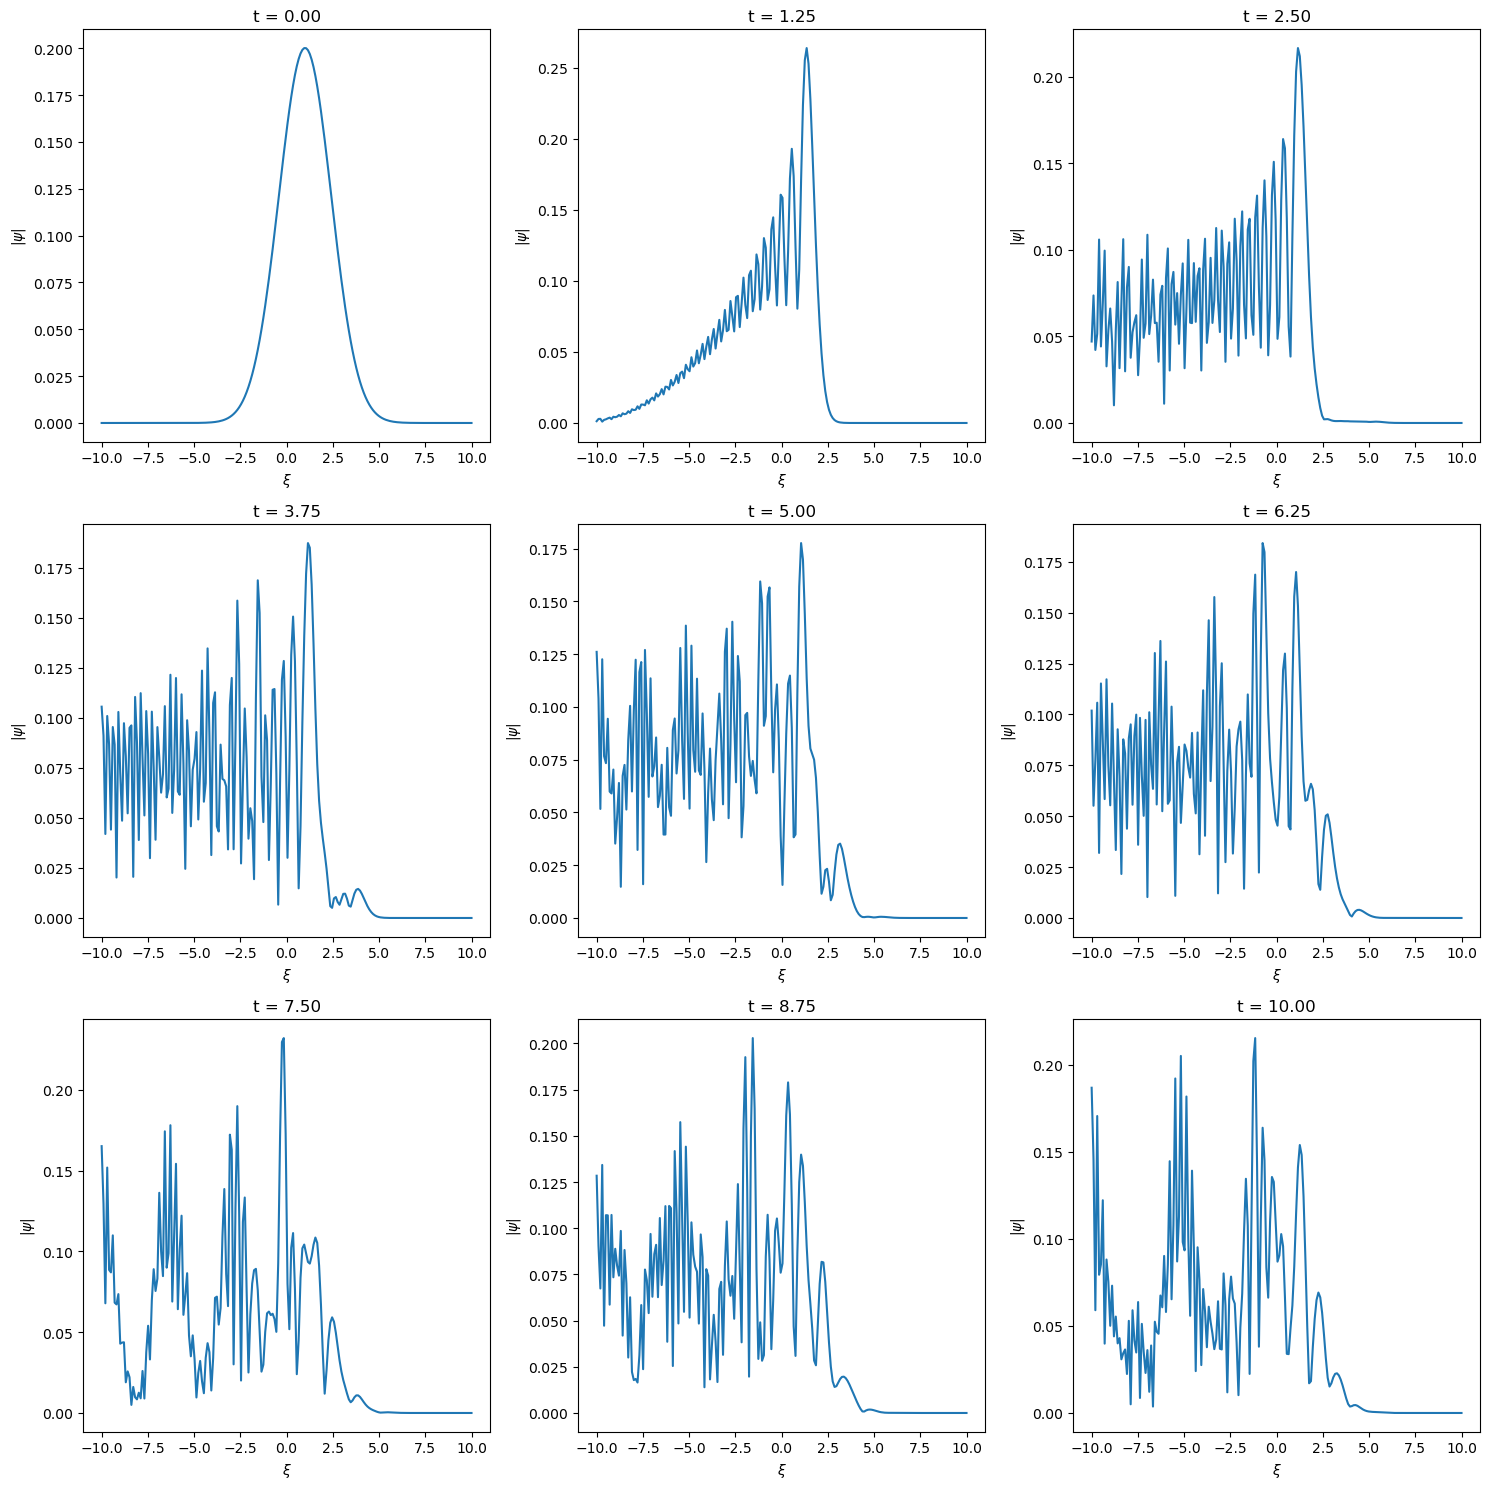

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, phi in enumerate(psis):
    row = i // 3
    col = i % 3
    ax[row, col].plot(Xi, np.abs(phi))
    ax[row, col].set_title(f"t = {Pit[i]:.2f}")
    ax[row, col].set_xlabel(r"$\xi$")
    ax[row, col].set_ylabel(r"$|\psi|$")

fig.tight_layout()